In [41]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [42]:
df = pd.read_csv("subject_data.csv")
#df1 = pd.read_csv("incident_data.csv")
#df2 = pd.read_csv("census_pop_2013.csv")

In [43]:
df.head(25)

,Date,NumberOfSubjects,Fatal,SubjectArmed,SubjectRace,SubjectGender,SubjectAge,NatureOfStop,NumberOfShots,NumberOfOfficers,OfficerRace,OfficerGender,Department,FullNarrative,City,Notes
0,3/4/2010,1,N,N,L,U,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,motorized vehicle; no hits
1,1/9/2010,1,F,Y,W,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN
2,6/10/2010,1,F,Y,W,M,U,NaN,NaN,2,W;W,M;M,Albuquerque Police Department,NaN,Albuquerque,NaN
3,11/10/2010,1,N,Y,U,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN
4,11/11/2010,1,N,Y,L,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN
5,11/11/2010,1,N,N,L,F,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,motorized vehicle
6,6/4/2011,1,F,Y,L,M,U,NaN,NaN,3,H;W;W,M;M;M,Albuquerque Police Department,NaN,Albuquerque,NaN
7,9/7/2011,1,N,Y,U,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN
8,2/9/2011,1,F,Y,W,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN
9,5/10/2011,1,F,Y,L,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN


In [44]:
df.isnull().sum()

Date                   0
NumberOfSubjects       0
Fatal                  0
SubjectArmed         583
SubjectRace            1
SubjectGender          2
SubjectAge             3
NatureOfStop        2843
NumberOfShots       3140
NumberOfOfficers     538
OfficerRace          454
OfficerGender          0
Department             0
FullNarrative       2378
City                   0
Notes               1962
dtype: int64

In [45]:
df['SubjectRace'].describe()

count     4399
unique       6
top          B
freq      1670
Name: SubjectRace, dtype: object

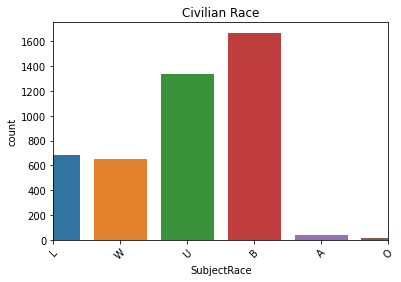

In [46]:
sns.countplot(df['SubjectRace'])
plt.title("Civilian Race")
plt.xlim(0, 5)
plt.xticks(rotation=45)
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=.80)
print(train.shape, test.shape)

(3520, 16) (880, 16)


In [48]:
df['SubjectRace'].unique()

array(['L', 'W', 'U', 'B', 'A', 'O', nan], dtype=object)

In [49]:
df.describe(include=[object])

,Date,Fatal,SubjectArmed,SubjectRace,SubjectGender,SubjectAge,NatureOfStop,NumberOfShots,NumberOfOfficers,OfficerRace,OfficerGender,Department,FullNarrative,City,Notes
count,4400,4400,3817,4399,4398,4397,1557,1260,3862,3946,4400,4400,2022,4400,2438
unique,2328,5,4,6,4,75,435,103,25,216,96,49,1769,47,868
top,2010,N,Y,B,M,U,Call For Service,1,1,U,M,Chicago Police Department,NO HITS,Chicago,Firearm Discharge - No Hits
freq,107,2719,1661,1670,2890,2345,128,279,2319,1270,1739,527,9,528,178


In [50]:
features = ['OfficerRace', 'OfficerGender', 'NumberOfShots', 'Department', 'City', 'NatureOfStop','SubjectGender']

target = ['SubjectRace']


X_train = train[features]
y_train = train[target]
y_test = test[target]
X_test = test[features]
